# Building the hr, bp, rr signals according to a specific model

In [7]:
def closest(x,set):
    min_diff = np.inf
    for i in set:
        if np.abs(x-i) < min_diff:
            min_diff = np.abs(x-i)
            res = i
    return res

def hr_fix(hr):
    fix_values = [60/(0.002 * i) for i in range(100,500,1)]
    hr_fixed = []
    for hr_value in hr:
        hr_fixed.append(closest(hr_value, fix_values))
    return hr_fixed

def rr_fix(rr):
    fix_values = [60/(0.016 * i) for i in range(10,500,1)]
    rr_fixed = []
    for rr_value in rr:
        rr_fixed.append(closest(rr_value, fix_values))
    return rr_fixed

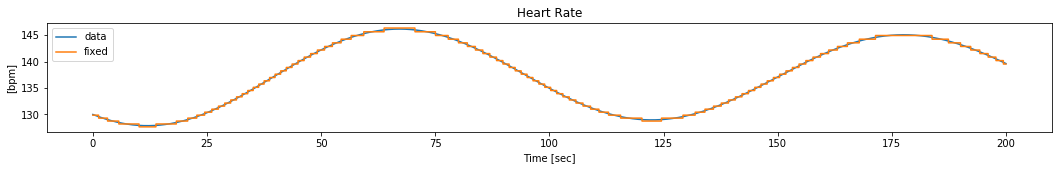

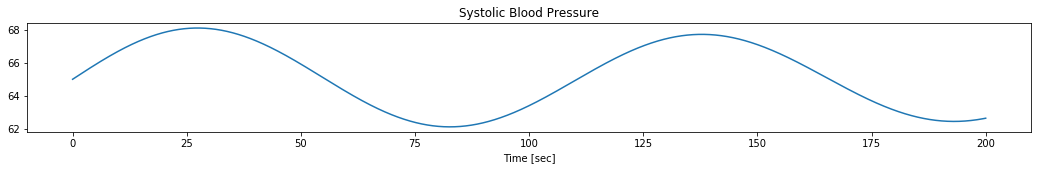

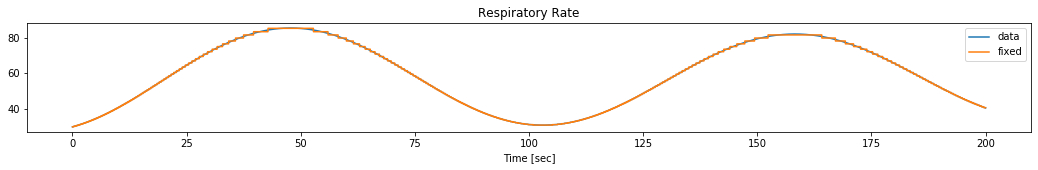

In [8]:
%run configuration.ipynb
%run heart-rate.ipynb
%run linear-regression.ipynb

# build a model (the period itself doesn't matter)
train_start = 100 
train_end = 2250
model = find_T(train_start, train_end, None, 1)

# build the "processed data" according to the model
data = np.array([[130],[65],[30]]) # hr[1]=130, bp[1]=65, rr[1]=30
last_coloumn_data = data
for i in range(200000):
    last_coloumn_data = np.dot(model.T, last_coloumn_data)
    data = np.hstack((data,last_coloumn_data))

hr = data[0]
bp = data[1]
rr = data[2]
time = np.arange(0,len(hr)/F,1/F)

hr_fixed = hr_fix(hr)
rr_fixed = rr_fix(rr)

plt.figure(figsize=(FIG_WIDTH, FIG_HEIGHT))
plt.plot(time,hr)
plt.plot(time,hr_fixed)
plt.title('Heart Rate')
plt.xlabel('Time [sec]')
plt.ylabel('[bpm]')
plt.legend(['data', 'fixed'], loc='best')
plt.show()

plt.figure(figsize=(FIG_WIDTH, FIG_HEIGHT))
plt.plot(time,bp)
plt.title('Systolic Blood Pressure')
plt.xlabel('Time [sec]')
plt.show()

plt.figure(figsize=(FIG_WIDTH, FIG_HEIGHT))
plt.plot(time,rr)
plt.plot(time,rr_fixed)
plt.title('Respiratory Rate')
plt.xlabel('Time [sec]')
plt.legend(['data', 'fixed'], loc='best')
plt.show()


# Reverse the preproccesing process to get the original data set in csv files (ECG, blood pressure, resp)

In [11]:
with open('samples/simulator-MDC_ECG_ELEC_POTL_II-500.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow([0, 8300])
    last_peak = 0
    for j in np.arange(0.002,190, 0.002):
        i=round(j,3)
        if np.abs(60/(i-last_peak) - hr_fixed[(int)((last_peak+(i-last_peak)/2)/0.001)]) <= 1:
            writer.writerow([i, 8300])
            last_peak = i
        else:
            writer.writerow([i, 0])

with open('samples/simulator-MDC_PRESS_BLD_ART_ABP-125.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    count = 0
    for j in np.arange(0,200, 0.008):
        i=round(j,3)
        if count%50 == 0:
            writer.writerow([i, bp[(int)(i/0.001)]])
        else:
            writer.writerow([i, 0])
        count = count + 1
        
with open('samples/simulator-MDC_RESP-62.5.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow([0, 1400])
    last_peak = 0
    for j in np.arange(0.016,190, 0.016):
        i=round(j,3)
        if np.abs(60/(i-last_peak) - rr_fixed[(int)((last_peak+(i-last_peak)/2)/0.001)]) <= 1:
            writer.writerow([i, 1400])
            last_peak = i
        else:
            writer.writerow([i, 0])
                   